In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Space discretisation
L = 10
J = 20
h_x = L/(J+1)
X = np.array([h_x*i for i in range(1, J+2)])

#Time discretisation
T = 1
N = 20
h_t = T/(N+1)
TIMES = np.array([h_t*i for i in range(1, N+2)])

#Definition of the f term
T0 = 1
n = 1
tau = 1
def f(time, space_array):
    return T0*(1+np.cos(space_array*n*np.pi/L))*(1/(1+np.exp(-time/tau)))

#Definition of the non-linear term
u0 = 1
def F(U_array):
    return U_array*(U_array/u0 - 1/2)*(1 - U_array/u0)

#Initialisation of the matrix that will ultimatly contain our computed values of u with the values for time = 0
U = np.zeros((N+1, J+1))
u1 = 1
U[0,:] = u1*np.cos(X)

#Definition of some constants (scalars and matrices) used for the scheme
beta = 1
a = 1

A = np.eye(J+1)*-2 + np.eye(J+1, k=-1) + np.eye(J+1, k=1)
A[J, J] = -1

K = np.array([0 for i in range(J+1)])
K[0] = beta*a/h_x**2

#Inductive computation of the values of u using the scheme's formula
for i in range(1, N+1):
    U[i,:] = h_t * f(h_t*i, X) + h_t*F(U[i-1,:]) + np.dot(((beta*h_t/(h_x**2))*A + np.eye(J+1)), U[i-1, :]) + h_t*K

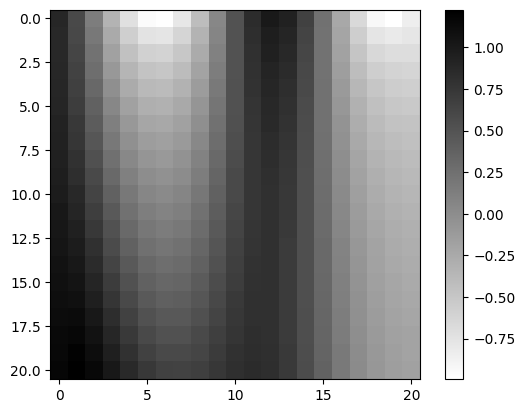

In [33]:
#Heat map representation of the computed U matrix
plt.imshow(U, cmap='binary')
plt.colorbar()
plt.show()